# TP - Application de la régression linéaire

In [1]:
### Le déroulement du TP

""""
1. Processus d'apprentissage automatique
2. Formulation du problème

3. Chargement des données brutes
4. Prétraitement des données
    - Analyse exploratoire des données
    - Nettoyage des données
    - Sélection des caratéristiques (features)
5. Répartition des données (entraînement/test)
6. Qu'est-ce que l'analyse de régression linéaire ?
7. Déploiement de la régression
8. Évaluation du modèle de la régression
9. Comment utiliser notre modèle de régression linéaire
"""

'"\n1. Processus d\'apprentissage automatique\n2. Formulation du problème\n\n3. Chargement des données brutes\n4. Prétraitement des données\n    - Analyse exploratoire des données\n    - Nettoyage des données\n    - Sélection des caratéristiques (features)\n5. Répartition des données (entraînement/test)\n6. Qu\'est-ce que l\'analyse de régression linéaire ?\n7. Déploiement de la régression\n8. Évaluation du modèle de la régression\n9. Comment utiliser notre modèle de régression linéaire\n'

### 1. Processus d'apprentissage automatique

In [2]:
import os
from IPython.display import Image
#Image(filename = "apprentissage_automatique.png", width=900, height=900)



### 2. Formulation du problème

- Dans cet exemple, nous voulons étudier "quels facteurs/variables affectent les performances des recettes".
- Notre objectif est de faire des suggestions sur la manière de générer plus de recettes;
- Faire des prévisions de recettes en fonction de valeurs des variables spécifiques.
- Notre variable dépendante (y) est donc Recette

#### Importer les librairies

In [3]:
# libraries
import os
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt

# Affichage avec la bibliothèque graphique intégrée à Notebook
%matplotlib inline


# Pour installer sklearn, tapez "pip install numpy scipy scikit-learn" sur le terminal anaconda

# Pour changer les nombres du format scientifique en flottants
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Pour augmenter la taille des figures de sns (seaborn)
sns.set(rc={'figure.figsize':(12,10)})

### 3. Chargement des données brutes

In [4]:
# Charger  les données
df = pd.read_csv('marketing.csv')

# Afficher les formats


# Afficher les 10 premières lignes
df.head(10)

,Date,Semaine,Semaine_ID,Mois,Mois_ID,Annee,Jour_Nom,Visitors,Recette,Depense Marketing,Promo
0,9/11/2020,46.0,34.0,11.0,11.0,2020.0,Lundi,707.0,465.0,651.375000,Pas de Promo
1,10/11/2020,46.0,34.0,11.0,11.0,2020.0,Mardi,1455.0,10386.0,1298.250000,Promo Rouge
2,11/11/2020,46.0,34.0,11.0,11.0,2020.0,Mercredi,1520.0,12475.0,1559.375000,Promo Bleu
3,12/11/2020,46.0,34.0,11.0,11.0,2020.0,Jeudi,1726.0,11712.0,1801.750000,Pas de Promo
4,13/11/2020,46.0,34.0,11.0,11.0,2020.0,Vendredi,2134.0,10000.0,2614.500000,Pas de Promo
5,14/11/2020,46.0,34.0,11.0,11.0,2020.0,Samedi,1316.0,12996.0,1444.000000,Promo Bleu
6,15/11/2020,47.0,35.0,11.0,11.0,2020.0,Dimanche,1287.0,11929.0,1325.444444,Promo Bleu
7,16/11/2020,47.0,35.0,11.0,11.0,2020.0,Lundi,1548.0,5359.0,1119.111111,Pas de Promo
8,17/11/2020,47.0,35.0,11.0,11.0,2020.0,Mardi,1448.0,12016.0,1092.363636,Promo Bleu
9,18/11/2020,47.0,35.0,11.0,11.0,2020.0,Mercredi,1362.0,7441.0,906.700000,Pas de Promo


## 4. Pré-traitement des données

### 4.1. Exploratory Data Analysis

In [5]:
# Détecter les valeurs nulles
df.isnull().sum()

Date                  0
Semaine               3
Semaine_ID            3
Mois                  3
Mois_ID               3
Annee                 3
Jour_Nom              3
Visitors              3
Recette               3
Depense Marketing     3
Promo                 3
dtype: int64

In [6]:
# Visualiser les lignes (observations) nulles
df.isnull()


,Date,Semaine,Semaine_ID,Mois,Mois_ID,Annee,Jour_Nom,Visitors,Recette,Depense Marketing,Promo
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
180,False,False,False,False,False,False,False,False,False,False,False
181,False,False,False,False,False,False,False,False,False,False,False
182,False,True,True,True,True,True,True,True,True,True,True
183,False,True,True,True,True,True,True,True,True,True,True


#### Moyens de traiter les données manquantes
- Supprimer toute observation contenant une ou plusieurs valeurs nulles
- Remplacez la valeur nulle par une autre valeur (moyenne, valeur du dernier jour, valeur du jour le plus proche, mode, médiane, zéro, etc.)

In [7]:
# Supprimer les valeurs nulles
df = df.dropna()

# Afficher la taille du jeu de données
print(df.shape)

# Visualiser à nouveau les lignes (obervations) nulles
df.isnull()

(182, 11)


,Date,Semaine,Semaine_ID,Mois,Mois_ID,Annee,Jour_Nom,Visitors,Recette,Depense Marketing,Promo
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
177,False,False,False,False,False,False,False,False,False,False,False
178,False,False,False,False,False,False,False,False,False,False,False
179,False,False,False,False,False,False,False,False,False,False,False
180,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# Enumérer les valeurs possibles dans chaque caractéristique (feature)  
for row in df:
    print(row)
    print(df[row].unique())
    print("==============")


Date
['9/11/2020' '10/11/2020' '11/11/2020' '12/11/2020' '13/11/2020'
 '14/11/2020' '15/11/2020' '16/11/2020' '17/11/2020' '18/11/2020'
 '19/11/2020' '20/11/2020' '21/11/2020' '22/11/2020' '23/11/2020'
 '24/11/2020' '25/11/2020' '26/11/2020' '27/11/2020' '28/11/2020'
 '29/11/2020' '30/11/2020' '1/12/2020' '2/12/2020' '3/12/2020' '4/12/2020'
 '5/12/2020' '6/12/2020' '7/12/2020' '8/12/2020' '9/12/2020' '10/12/2020'
 '11/12/2020' '12/12/2020' '13/12/2020' '14/12/2020' '15/12/2020'
 '16/12/2020' '17/12/2020' '18/12/2020' '19/12/2020' '20/12/2020'
 '21/12/2020' '22/12/2020' '23/12/2020' '24/12/2020' '25/12/2020'
 '26/12/2020' '27/12/2020' '28/12/2020' '29/12/2020' '30/12/2020'
 '31/12/2020' '1/1/2021' '2/1/2021' '3/1/2021' '4/1/2021' '5/1/2021'
 '6/1/2021' '7/1/2021' '8/1/2021' '9/1/2021' '10/1/2021' '11/1/2021'
 '12/1/2021' '13/01/2021' '14/01/2021' '15/01/2021' '16/01/2021'
 '17/01/2021' '18/01/2021' '19/01/2021' '20/01/2021' '21/01/2021'
 '22/01/2021' '23/01/2021' '24/01/2021' '25/01/202

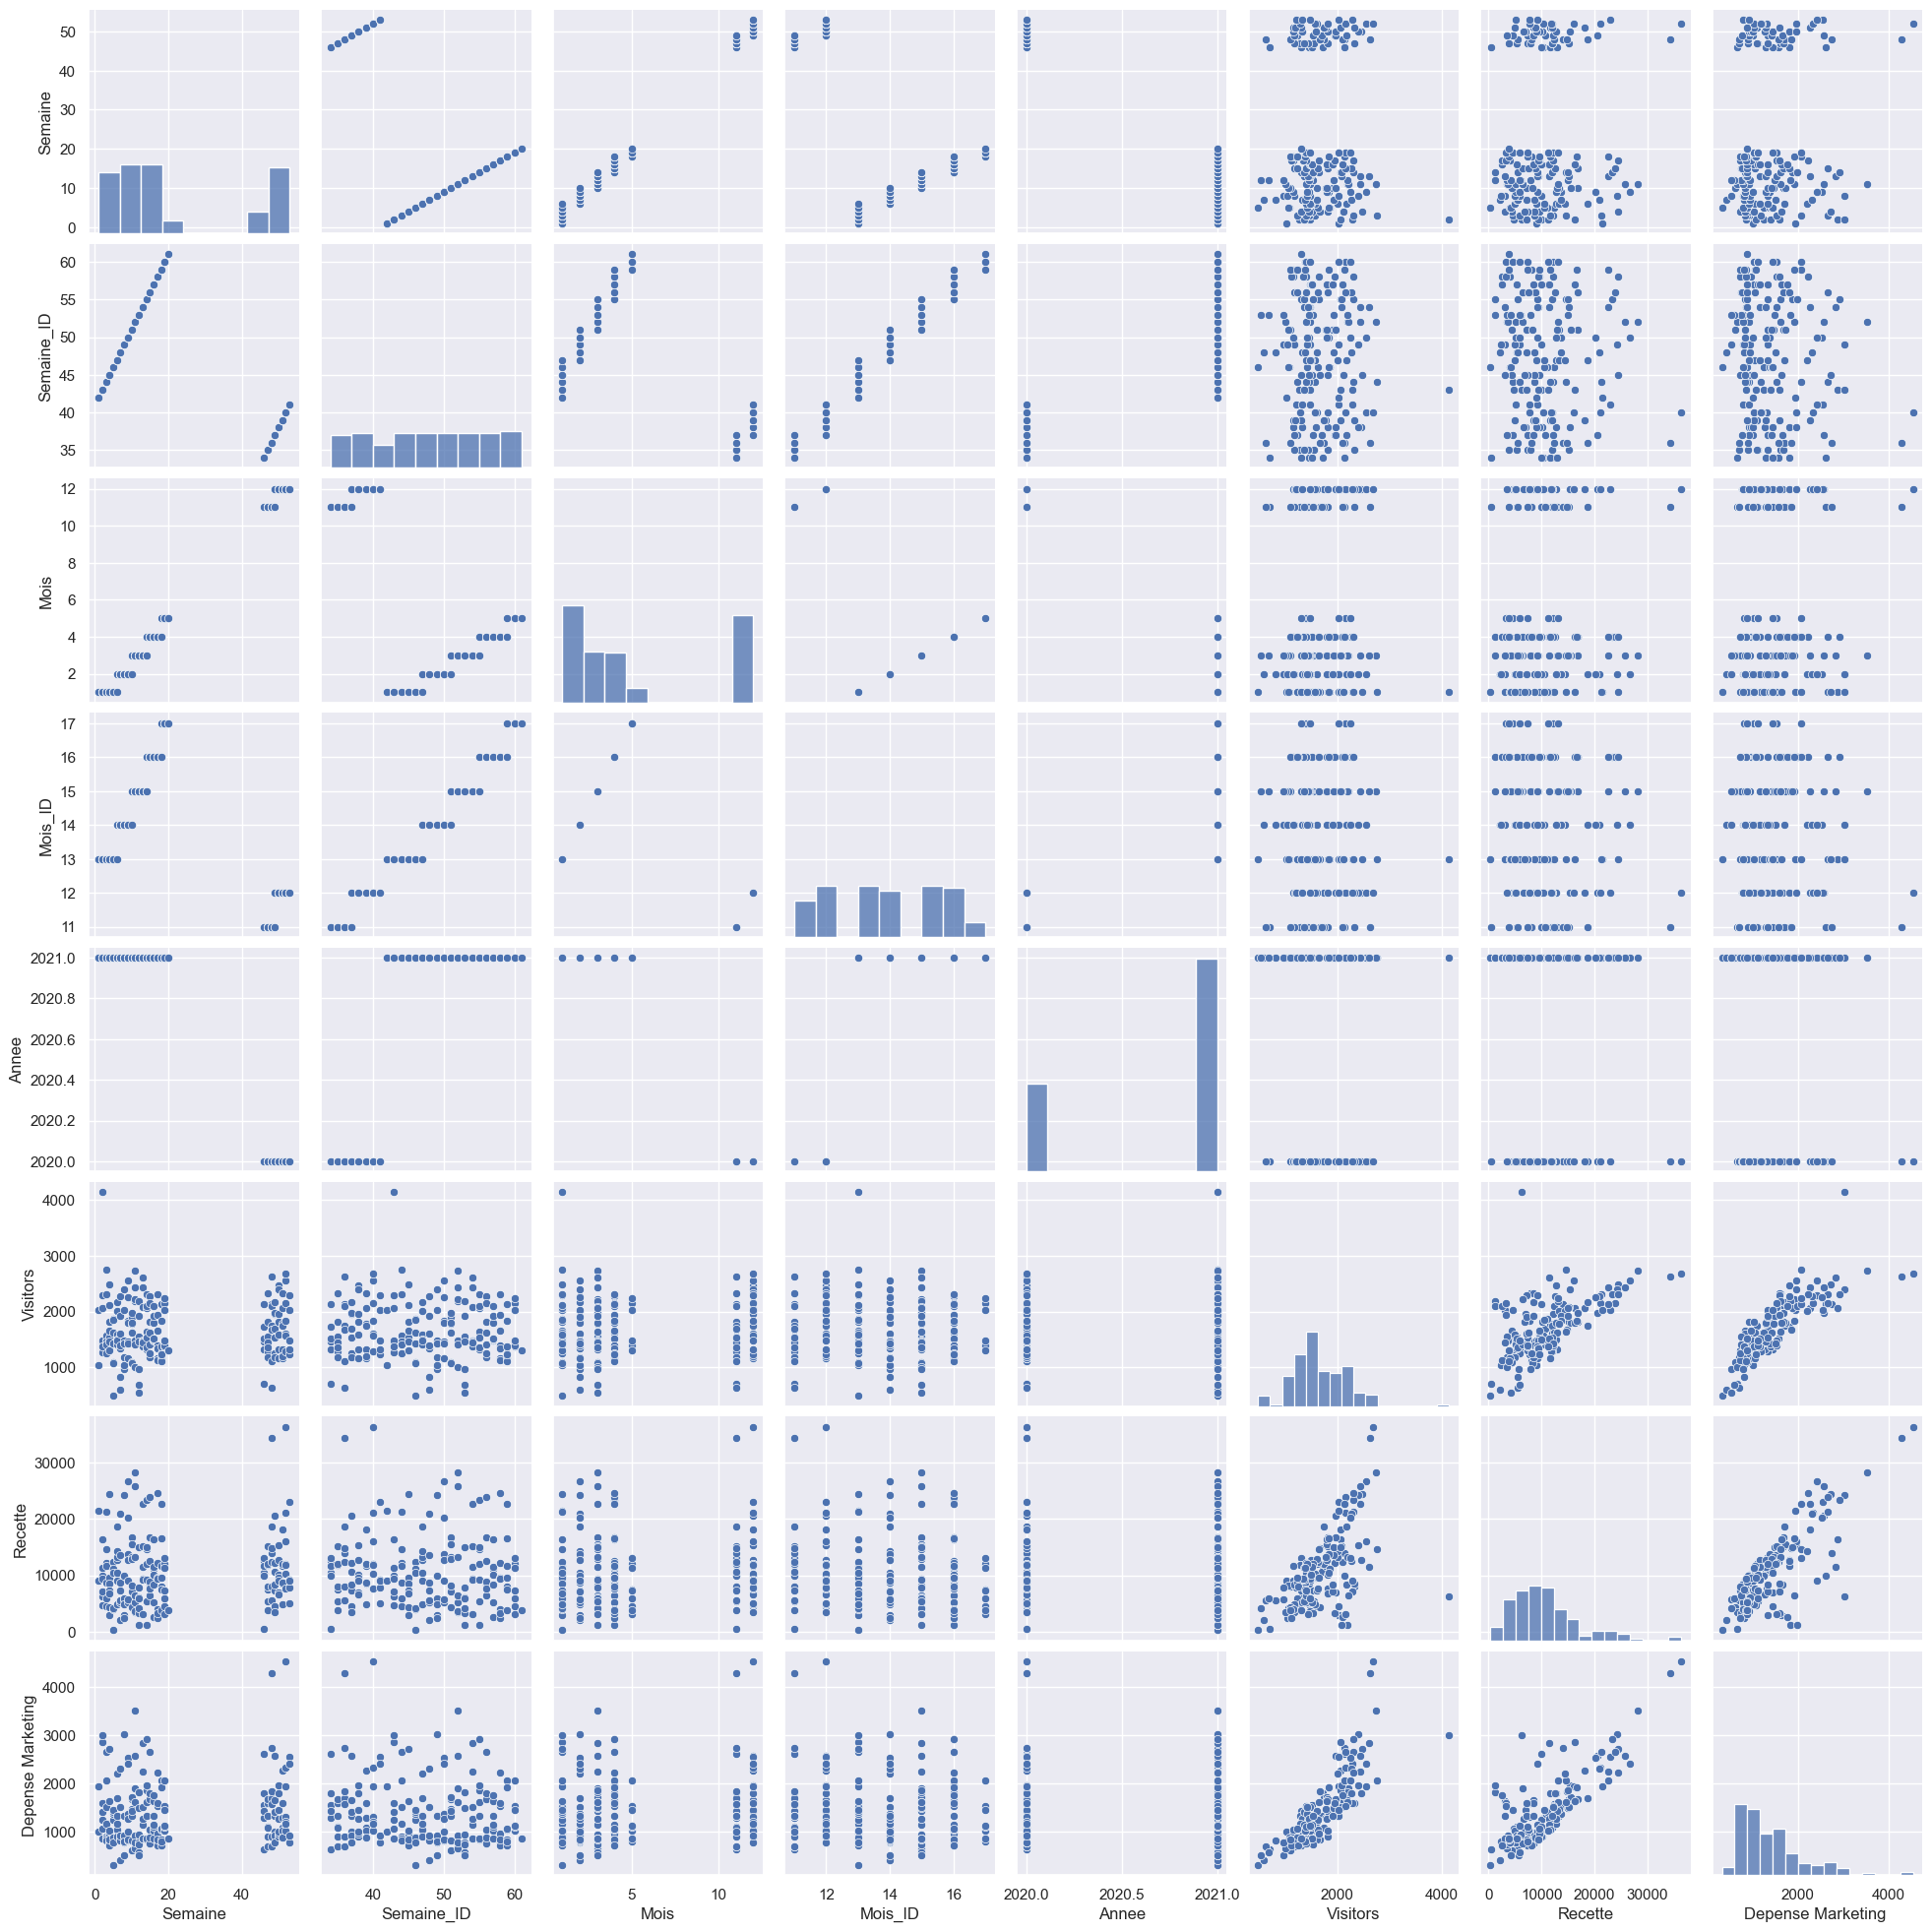

In [9]:
# Visualiser les données en utilisant Pairplots(seaborn). Quelles sont les caractéristiques qui vous semblent importantes
# et lesquelles ne sont pas informatives?
sns.pairplot(df)

#Notes : Ne pas utiliser celle-ci sur un jeu de données volumineux. Filtrez d'abord les colonnes

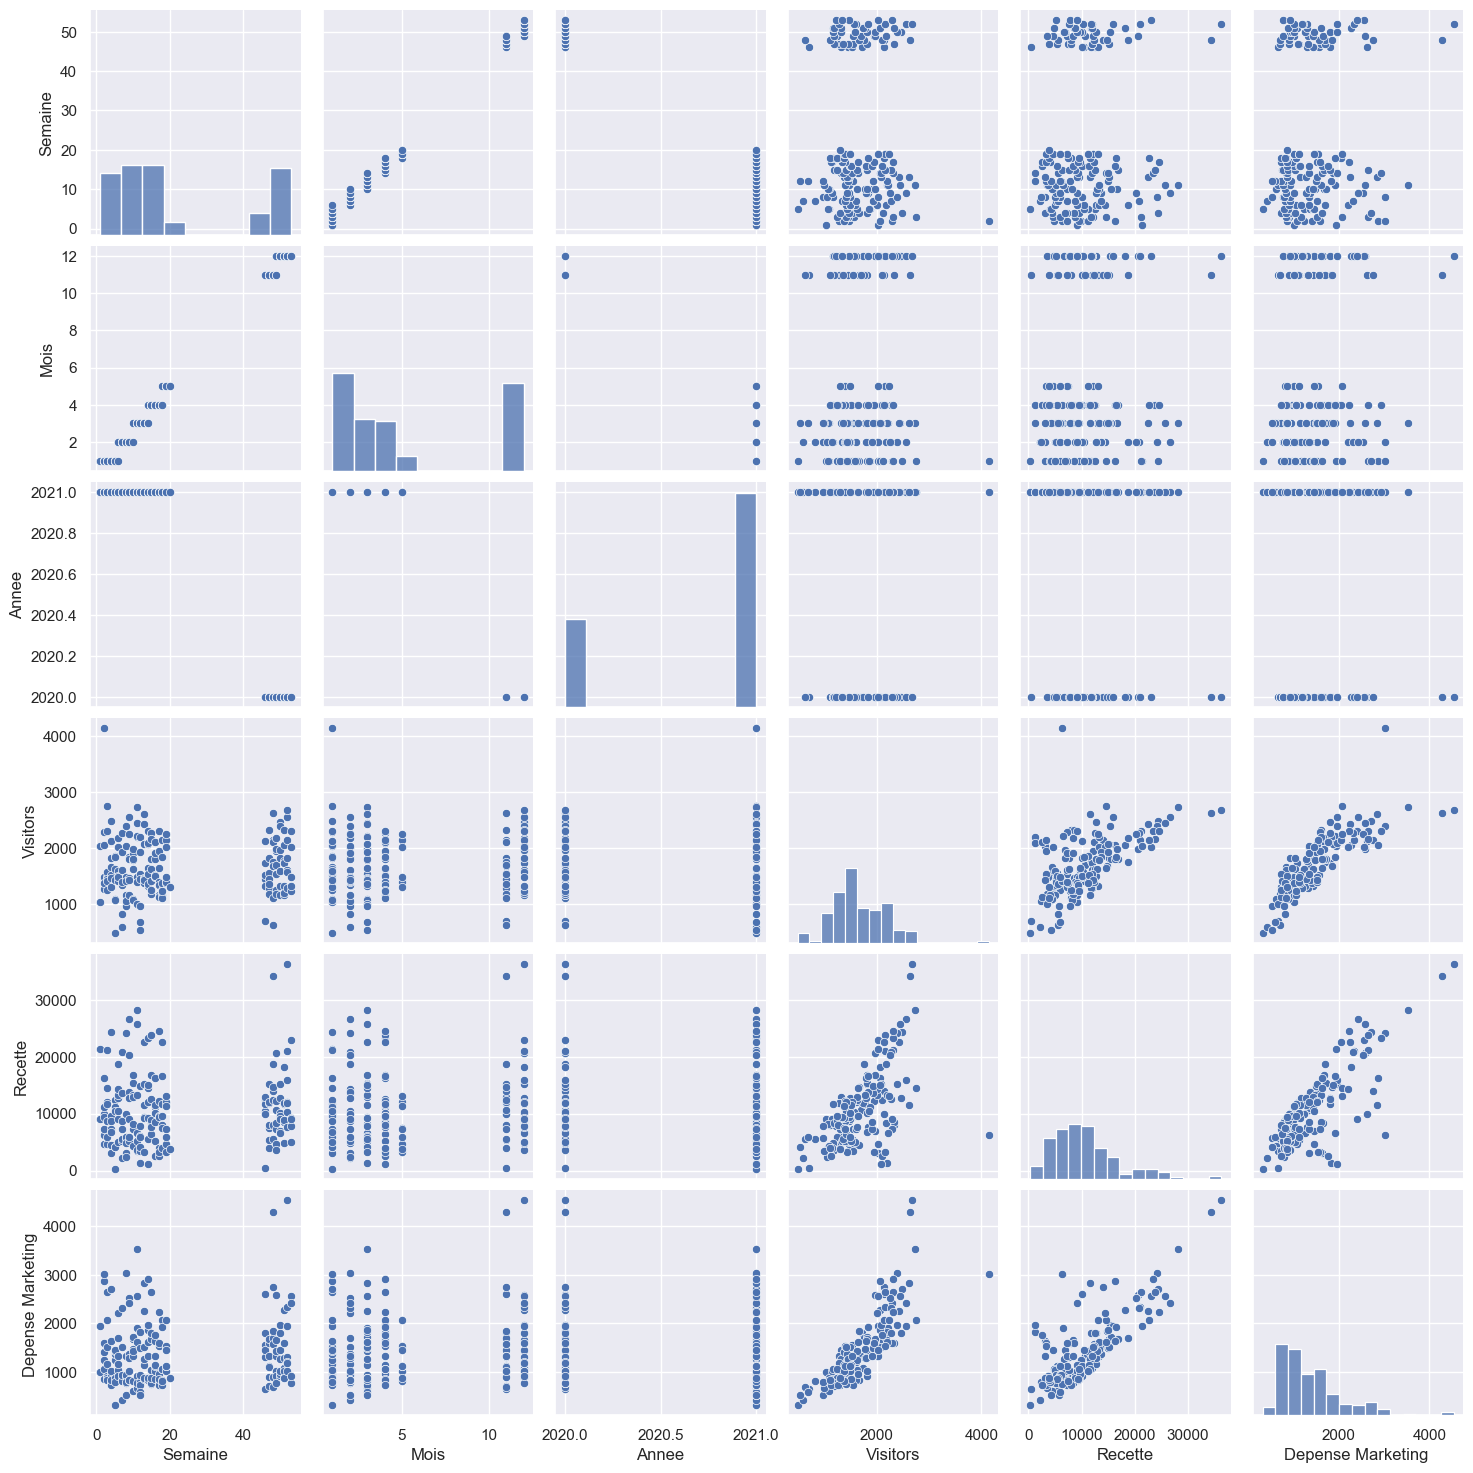

In [10]:
# Visualiser le jeu de données en utilisant Pairplots mais en sélectionnant que les caratéristiques importantes

excluded_columns = ['Semaine_ID', 'Mois_ID']
all_columns = df.columns.tolist()

included_columns = [col for col in all_columns if col not in excluded_columns]

sns.pairplot(data=df[included_columns])

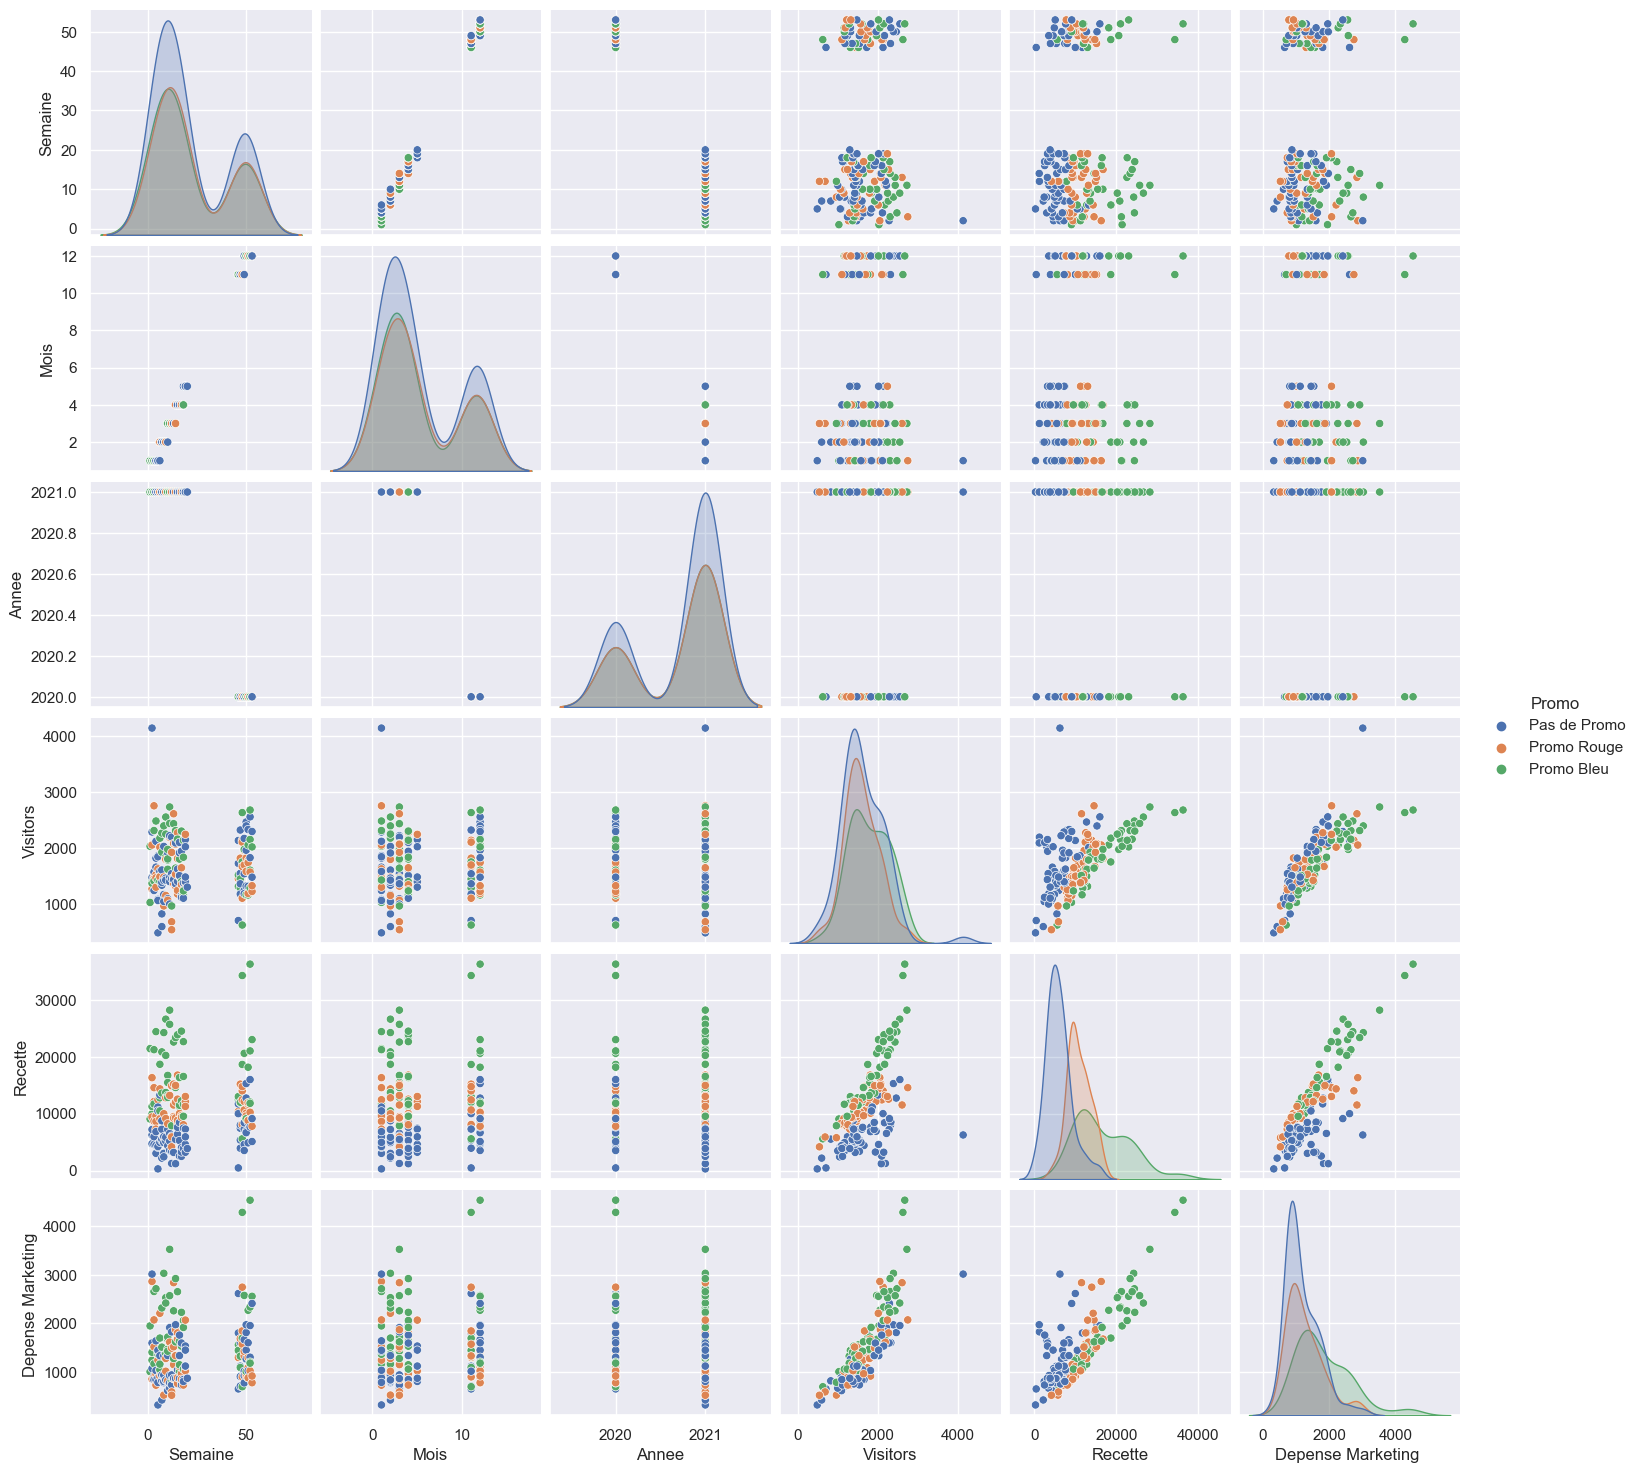

In [11]:
# Visualiser le jeu de données en utilisant Pairplots en gardant les mêmes caratéristiques importantes mais en considérant Promo
# comme variable de référence (pensez au paramètre hue de pairplots).
sns.pairplot(data=df[included_columns], hue="Promo")
# Quelles suggestions pourriez-vous faire à  l'entreprise sur la manière de générer plus de recettes? 

#Plus de promo pour plus de visiteurs, et plus de visiteurs pour plus de recettes 


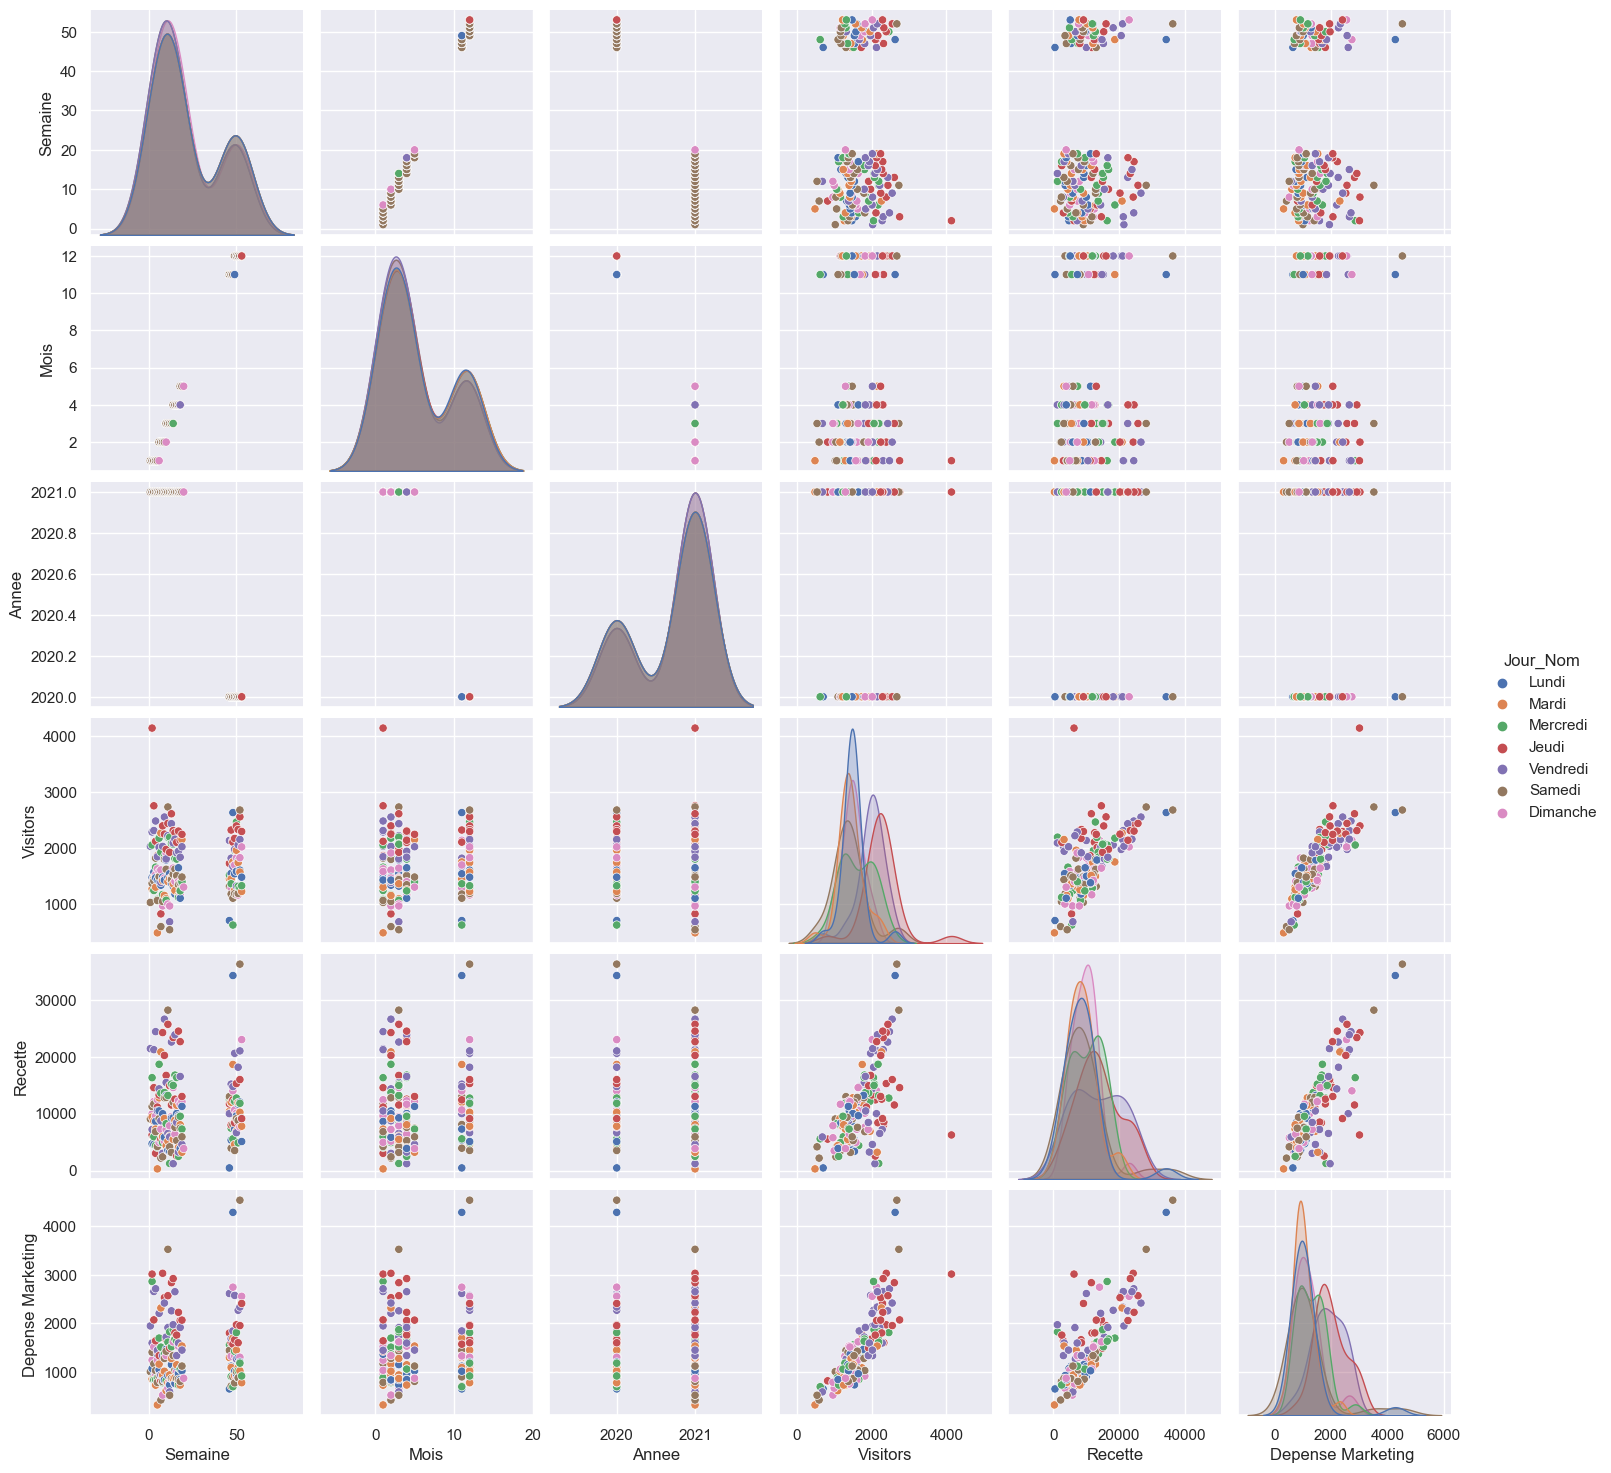

In [12]:
# Visualiser le jeu de données en utilisant Pairplots en gardant les mêmes caratéristiques importantes mais en considérant
# Jour_Nom comme variable de référence (pensez au paramètre hue de pairplots).
sns.pairplot(data=df[included_columns], hue="Jour_Nom")

# Quelle est la variable la plus importante par rapport à la variable Recette?

#C'est les dépences marketings

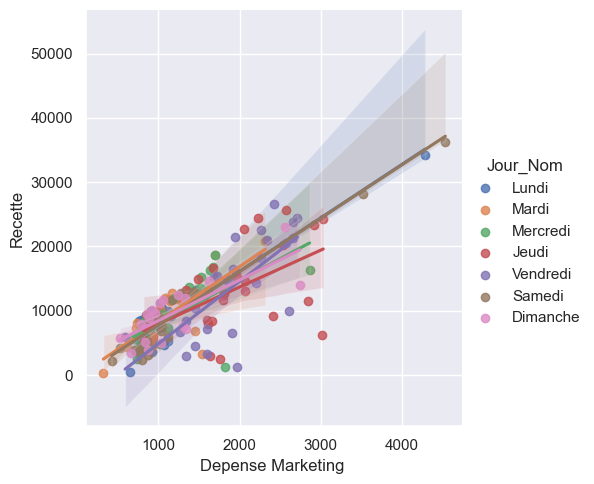

In [13]:
# Visualiser la relation entre les variables Recette et Depense Marketing dans chaque jour (c'est à dire pour
# chaque valeur de la variable Jour_Nom). Notons que la relation, ici, est modélisée par la régression simple, utilisez 
# seaborn pour afficher la grille de régressions.
sns.lmplot(x = 'Depense Marketing ', y = 'Recette', hue='Jour_Nom', data = df)


# Y a t-il un jour où la relation n'est pas forte entre Recette et Depense Marketing? 
# Peut-on considérer chacun des jours comme une variable à part au lieu de valeur? 


### Examiner la répartition des recettes par variables catégorielles Jour_Nom et Promo(mettre celle-ci en hue) via 
# les boîtes à moustache.
               

<Axes: xlabel='Jour_Nom', ylabel='Recette'>

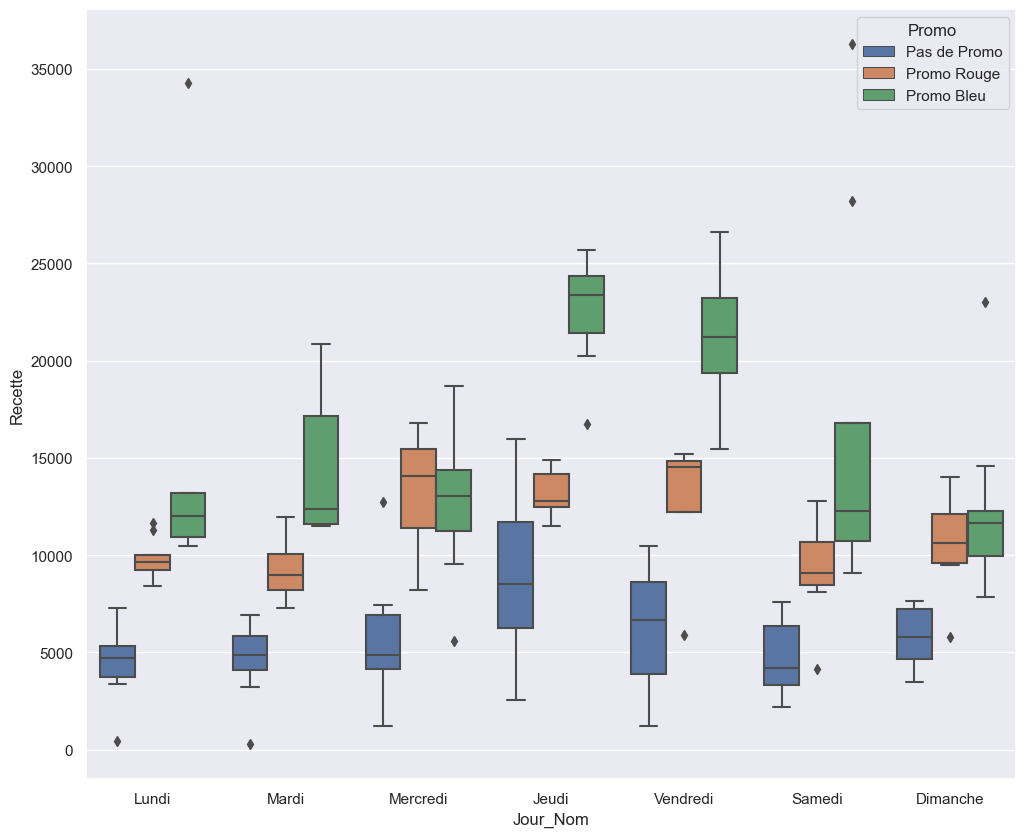

In [14]:
sns.boxplot(data=df, x="Jour_Nom", y="Recette", hue="Promo")

### 4.2. Nettoyage des données

<Axes: xlabel='Jour_Nom', ylabel='Recette'>

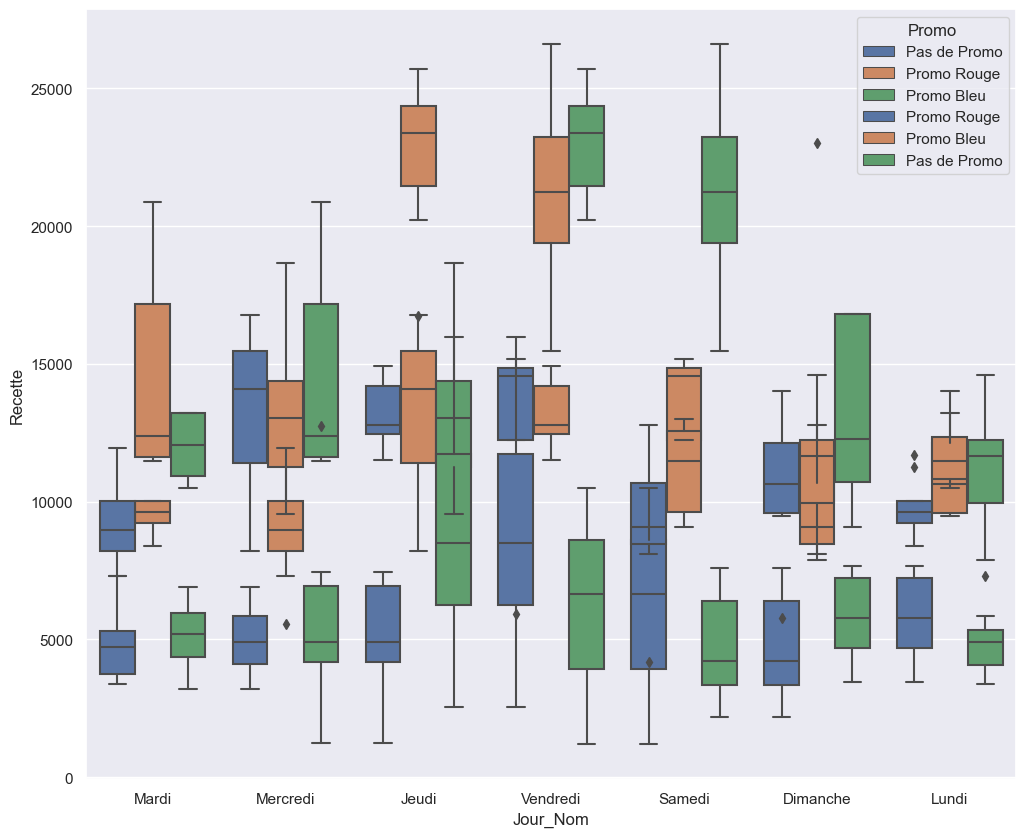

In [15]:
# Supprimer les obervations où les recettes semblent aberrantes. Pour cela, aidez vous des valeurs aberrantes
# qui sont à l'extérieur des boîtes à moustache.
sns.boxplot(data=df, x="Jour_Nom", y="Recette", hue="Promo", showfliers=False)

born_inf = 1000
born_sup = 27000

df = df[(df['Recette'] >= born_inf) & (df['Recette'] <= born_sup)]

sns.boxplot(data=df, x="Jour_Nom", y="Recette", hue="Promo")

In [16]:
# Affichier les noms des colonnes
df.columns

Index(['Date', 'Semaine', 'Semaine_ID', 'Mois', 'Mois_ID', 'Annee', 'Jour_Nom',
       'Visitors', 'Recette', 'Depense Marketing ', 'Promo'],
      dtype='object')

In [17]:
# Sélectionner que les colonnes utiles
TableauUtile = ['Date', 'Semaine', 'Visitors', 'Recette', 'Depense Marketing ', 'Promo', 'Jour_Nom']
#visualiser les données

df = df.loc[:, TableauUtile]

df.head(10)

,Date,Semaine,Visitors,Recette,Depense Marketing,Promo,Jour_Nom
1,10/11/2020,46.0,1455.0,10386.0,1298.250000,Promo Rouge,Mardi
2,11/11/2020,46.0,1520.0,12475.0,1559.375000,Promo Bleu,Mercredi
3,12/11/2020,46.0,1726.0,11712.0,1801.750000,Pas de Promo,Jeudi
4,13/11/2020,46.0,2134.0,10000.0,2614.500000,Pas de Promo,Vendredi
5,14/11/2020,46.0,1316.0,12996.0,1444.000000,Promo Bleu,Samedi
6,15/11/2020,47.0,1287.0,11929.0,1325.444444,Promo Bleu,Dimanche
7,16/11/2020,47.0,1548.0,5359.0,1119.111111,Pas de Promo,Lundi
8,17/11/2020,47.0,1448.0,12016.0,1092.363636,Promo Bleu,Mardi
9,18/11/2020,47.0,1362.0,7441.0,906.700000,Pas de Promo,Mercredi
10,19/11/2020,47.0,2321.0,8000.0,1605.454545,Pas de Promo,Jeudi


In [18]:
# Transformer les variables catégorielles en représentation numérique. Aide: get_dummies, Label Encoding, OneHotEncoder... 
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()
df['Promo'] = le.fit_transform(df['Promo'])
df['Jour_Nom'] = le.fit_transform(df['Jour_Nom'])
# Visualiser les données

df.head()

,Date,Semaine,Visitors,Recette,Depense Marketing,Promo,Jour_Nom
1,10/11/2020,46.0,1455.0,10386.0,1298.250,2,3
2,11/11/2020,46.0,1520.0,12475.0,1559.375,1,4
3,12/11/2020,46.0,1726.0,11712.0,1801.750,0,1
4,13/11/2020,46.0,2134.0,10000.0,2614.500,0,6
5,14/11/2020,46.0,1316.0,12996.0,1444.000,1,5


### 4.3. Sélection de caratéristiques

Dans cet exemple, nous n'avons pas beaucoup de variables et nous devrions donc utiliser toutes les données, mais dans certains cas, vous avez des milliers de variables et vous devrez les filtrer afin de gagner du temps de calcul

- Il existe deux façons de nous aider à sélectionner les caractéristiques importantes :
    - Corrélation 
    - Importance de la caractéristique

In [19]:
# Etudiez la corrélation (fonction corr de dataframe)
matrice = df.corr()
df.corr()

C:\Users\Guillaume\AppData\Local\Temp\ipykernel_5596\2561397075.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  matrice = df.corr()
C:\Users\Guillaume\AppData\Local\Temp\ipykernel_5596\2561397075.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Semaine,Visitors,Recette,Depense Marketing,Promo,Jour_Nom
Semaine,1.000000,0.006981,0.042892,0.053194,0.022914,-0.026395
Visitors,0.006981,1.000000,0.511338,0.833759,-0.044451,-0.045337
Recette,0.042892,0.511338,1.000000,0.718219,0.406200,0.022221
Depense Marketing,0.053194,0.833759,0.718219,1.000000,0.075787,0.046593
Promo,0.022914,-0.044451,0.406200,0.075787,1.000000,-0.067665
Jour_Nom,-0.026395,-0.045337,0.022221,0.046593,-0.067665,1.000000


#### Notes
- corr() est utilisé pour trouver la corrélation par paire de toutes les colonnes (caractéristiques) du dataframe. Toutes les valeurs nulles sont automatiquement exclues
- Plus on se rapproche de 1 ou de -1, mieux c'est. Lorsqu'une variable augmente, l'autre a tendance à augmenter / diminuer également
- 0,8 +- est une forte corrélation, 0,6 à 0,8 +- est une corrélation modérée Corrélation et les autres valeurs, il n'y a pas de corrélation

<Axes: >

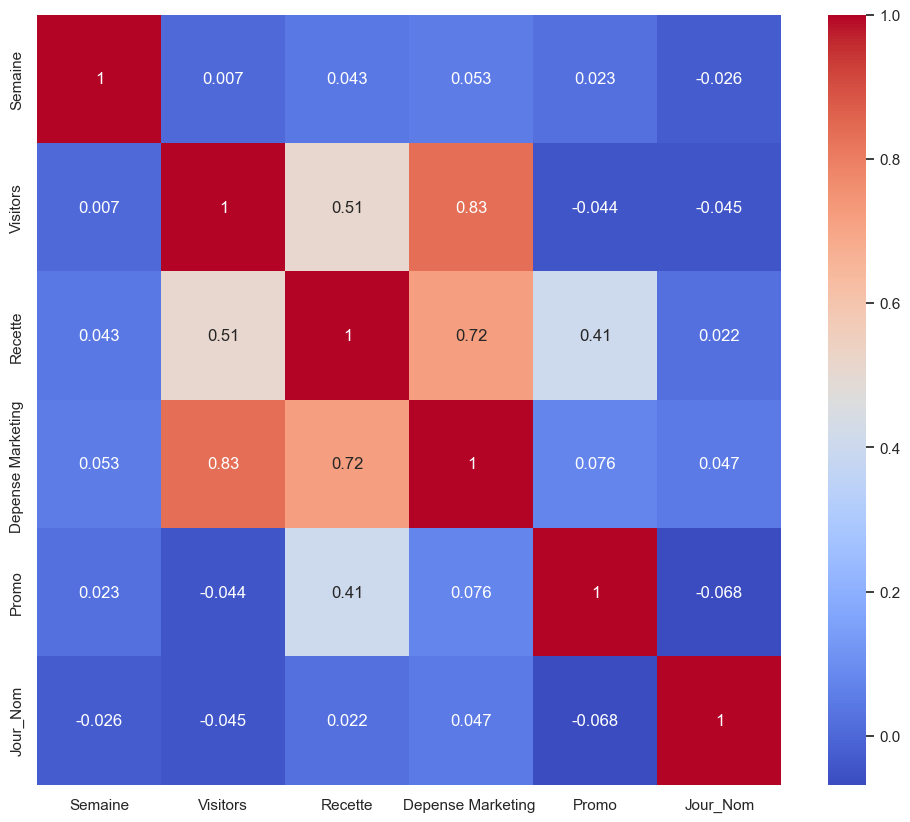

In [20]:
# Visualiser les corrélations avec un Heatmap
sns.heatmap(matrice, annot=True, cmap="coolwarm")


#### Etude de l'importance des caratéristiques
#Plan:
- Diviser les données en X et y
- Utiliser des estimateurs basés sur les arbres (c'est-à-dire des arbres de décision et des forêts aléatoires) 
- Calcul de l'importance de chaque caractéristique 

In [21]:
#  Diviser les données en X et y; X est l'ensemble des variables explicatives et y la variable à expliquer (Recette)

X = df[['Semaine', 'Visitors', 'Depense Marketing ', 'Promo', 'Jour_Nom']]
y = df['Recette']

# Afficher les premières lignes de X et y pour vérifier
print(X.head())
print(y.head())

   Semaine  Visitors  Depense Marketing   Promo  Jour_Nom
1     46.0    1455.0            1298.250      2         3
2     46.0    1520.0            1559.375      1         4
3     46.0    1726.0            1801.750      0         1
4     46.0    2134.0            2614.500      0         6
5     46.0    1316.0            1444.000      1         5
1    10386.0
2    12475.0
3    11712.0
4    10000.0
5    12996.0
Name: Recette, dtype: float64


In [22]:
# Utiliser des estimateurs basés sur les arbres (par exemple les arbres de décision)
# Aide: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Créer un modèle d'arbre de décision
tree_clf = DecisionTreeClassifier(random_state=42)

# Entraîner le modèle d'arbre de décision sur l'ensemble d'entraînement
tree_clf.fit(X_train, y_train)

# Faire des prédictions sur l'ensemble de test à l'aide du modèle d'arbre de décision
y_pred_tree = tree_clf.predict(X_test)

#### Notes:
- L'importance d'une caractéristique est calculée comme la réduction totale (normalisée) de l'entropie apportée par cette caractéristique ou le gain d'information plus élevé
- Pour comprendre les mathématiques sous-jacentes, lisez ceci : https://towardsdatascience.com/the-mathematics-of-decision-trees-random-forest-and-feature-importance-in-scikit-learn-and-spark-f2861df67e3

[0.265139 0.311233 0.229785 0.064674 0.129169]
Feature: 0, Score: 0.26514
Feature: 1, Score: 0.31123
Feature: 2, Score: 0.22979
Feature: 3, Score: 0.06467
Feature: 4, Score: 0.12917


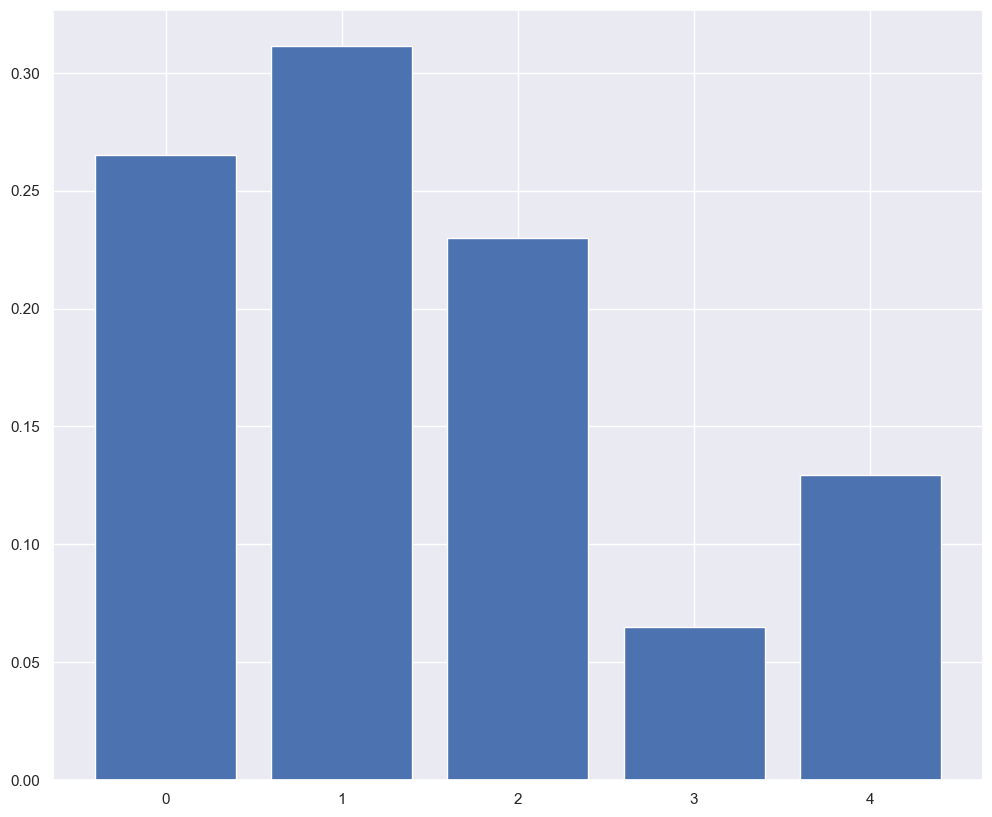

In [23]:
# Afficher l'importance de chaque caractéristique en faisant appel au tableau feature_importances_ retourné par l'arbre.

from matplotlib import pyplot

importance = tree_clf.feature_importances_
# summarize feature importance
print(importance)
for i,v in enumerate(importance):
 print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

#### Notes:
- Pus la valeur retourné par feature_importances_, pour une variable donnée i, est grande plus la variable i est importante

## 5. Fractionnement des données

In [24]:
# Fractionner les données en sous-ensembles d'entraînement et de test. Afficher les tailles de ces sous-ensembles.
# Aide: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
print("Taille de l'ensemble d'entraînement : ", X_train.shape[0])
print("Taille de l'ensemble de test : ", X_test.shape[0])

Taille de l'ensemble d'entraînement :  141
Taille de l'ensemble de test :  36


## 6. Qu'est-ce que l'analyse de régression linéaire ?
- La régression linéaire est un modèle d'apprentissage machine largement utilisé qui prédit des nombres continus en tant que résultats, et non des classes 
- Il modélise la relation entre une variable cible (à expliquer) et plusieurs variables (explicatives) en ajustant une équation linéaire aux données observées 
- Dans la régression linéaire, vous avez une variable dépendante (y) et une ou plusieurs variables indépendantes (X)
- Avant d'essayer de modéliser les données, vous devez d'abord vérifier s'il existe une relation entre les variables ; un bon moyen est d'utiliser un nuage de points pour visualiser les données




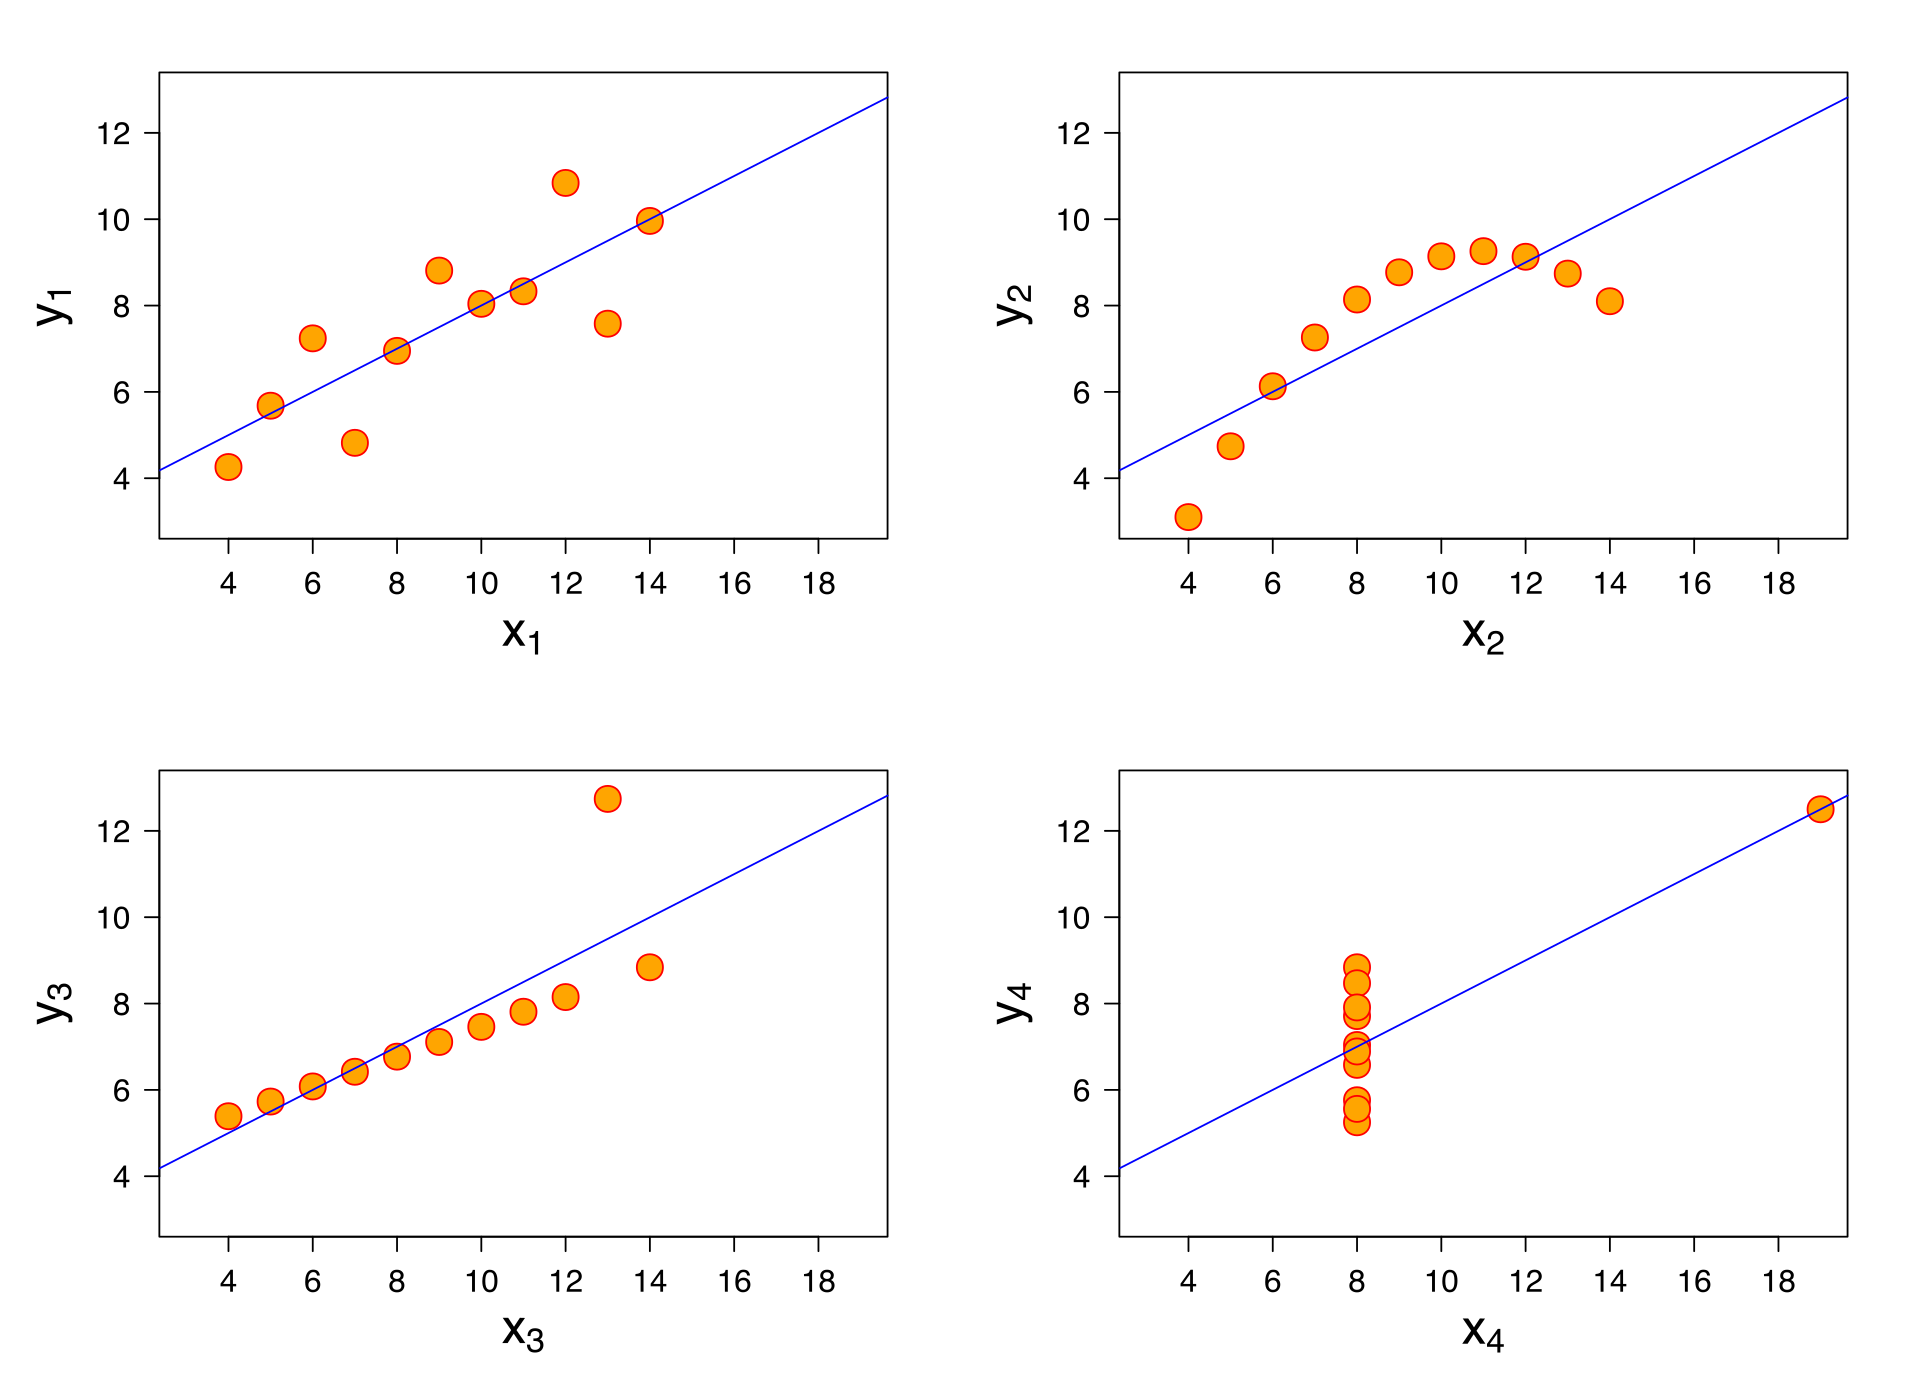

In [25]:
Image(filename = "anscombe.png", width=900, height=900)

### Qu'est-ce que l'analyse de régression linéaire (suite)

- Une mesure de la relation entre deux variables est le coefficient de corrélation ; il varie de -1 à 1 ; plus il est proche de 1 ou -1, plus la relation est forte

- Cependant, même s'il semble y avoir une relation, vous devez toujours être prudent lorsque vous modélisez la relation entre deux variables car la corrélation n'est pas une causalité. Par exemple, l'augmentation de la température par rapport au revenu

- L'équation mathématique de la régression linéaire est Y = a + bX ; où X est la variable indépendante et Y est la variable dépendante. b" est la pente de la droite et "a" est l'ordonée à l'origine (la valeur de y lorsque x = 0)


- La fonction de coût la plus couramment utilisée dans la régression linéaire est la fonction des "Erreurs des moindres carrés (Least Squared Errors)", qui est la somme des erreurs carrées (somme (y réel - y prédit) ^ 2) sur l'ensemble du jeu de données, en essayant de minimiser l'écart entre les prédictions et les cibles réels.

- Pour calculer les "erreurs des moindres carrés", vous devez d'abord calculer la différence entre le réel (y) et le y prédit ; c'est ce qu'on appelle les résidus.

- Afin de trouver l'erreur la moins élevée au carré, vous devez trouver les valeurs optimales des paramètres (b) qui minimisent la somme "S" des résidus au carré


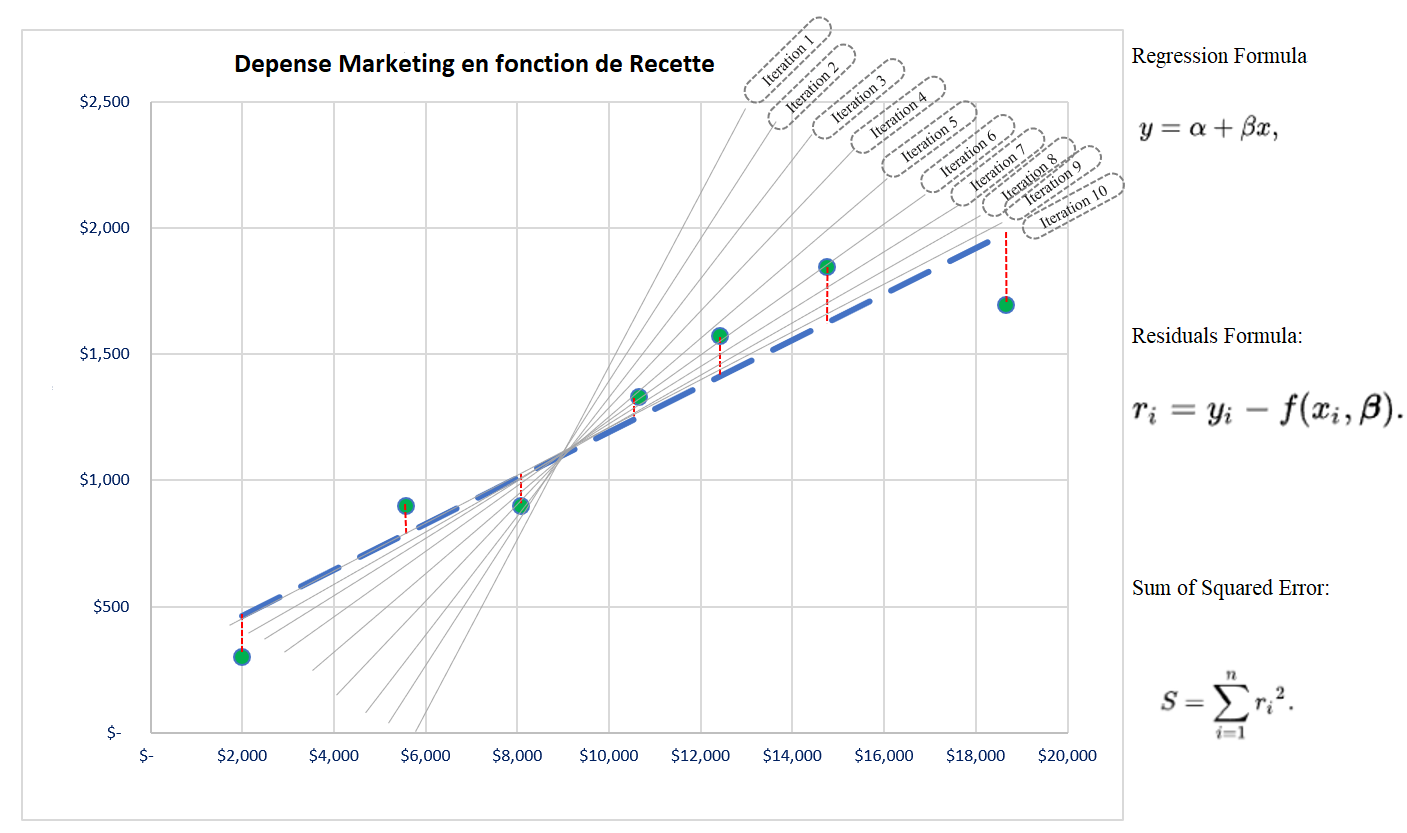

In [26]:
# Comment la régression linéaire itére jusqu'à la convergence
Image(filename = "recette.png", width=900, height=900)


#### Qu'est-ce que l'analyse de régression linéaire (suite)
- La technique d'optimisation utilisée dans la régression linéaire est la descente de gradient  ; qui tente de trouver un minimum local ou global d'une fonction de coût

- La descente de gradient permet de trouver la direction de la "pente" que le modèle/ligne doit prendre afin de réduire les erreurs. 

- La direction fait référence aux poids (a et b) et à la manière dont ces poids doivent être modifiés pour réduire davantage les erreurs. 

- Le modèle va itéré jusqu'à ce qu'il converge ; aucune autre amélioration ne peut être apportée ; voir le graphique ci-dessous : 

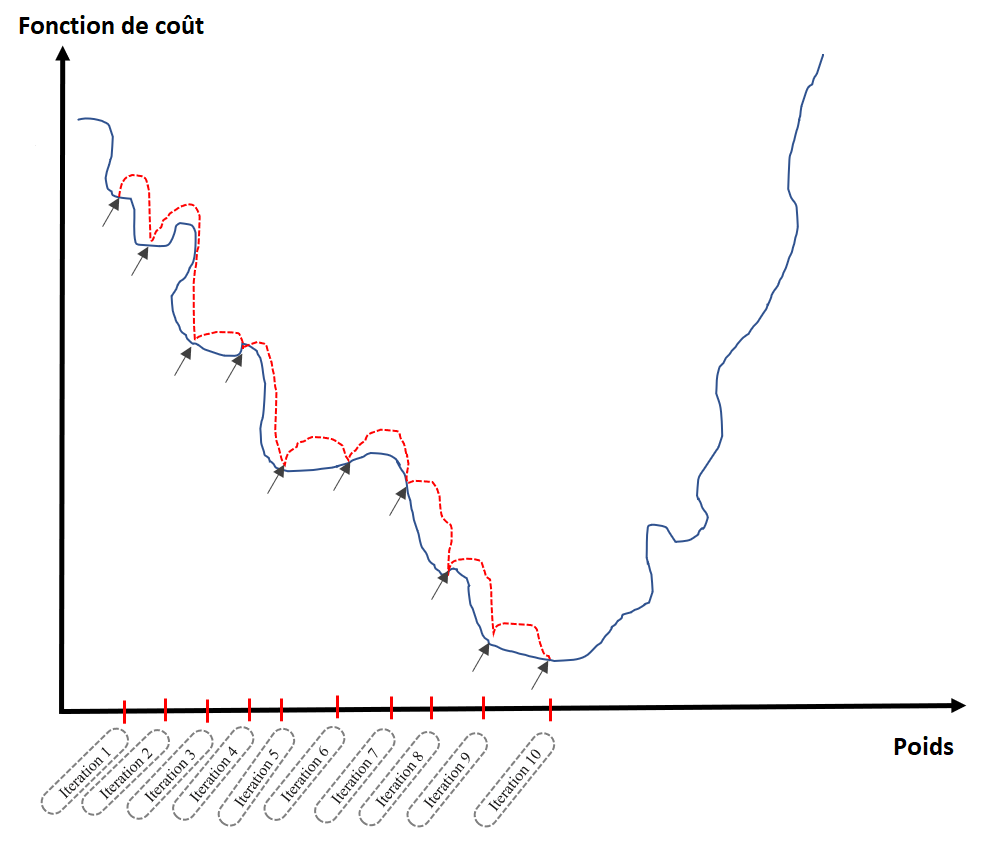

In [27]:
# Descente de gradient
Image(filename = "descente gradient.png", width=900, height=900)

## 8. Lancer la régression linéaire

In [28]:
# Lancer l'étape de l'entraînement de la régression linéaire
# Aide: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

# Créer un modèle de régression linéaire
lin_reg = LinearRegression()

# Entraîner le modèle de régression linéaire sur l'ensemble d'entraînement
lin_reg = lin_reg.fit(X_train, y_train)

In [53]:
# Faire des prédictions sur le sous-ensemble de données d'entraînement

y_pred_lin = lin_reg.predict(X_test)

print(X_test)

     Semaine  Visitors  Depense Marketing   Promo  Jour_Nom
21      49.0    1541.0         1016.000000      0         2
48      53.0    2020.0         2557.111111      1         0
144     14.0    2091.0         1972.750000      0         6
32      50.0    1322.0         1267.500000      0         6
70       4.0    1469.0          784.818182      2         2
18      48.0    1671.0         1845.000000      2         6
123     11.0    2220.0         1912.750000      0         6
178     19.0    2244.0         2067.888889      2         1
113     10.0    1096.0          615.500000      0         3
145     14.0    1532.0         1336.333333      2         5
26      49.0    1186.0          776.500000      0         5
166     17.0    1345.0          850.909091      2         5
43      52.0    1571.0         1024.500000      2         3
122     11.0    2439.0         2570.400000      1         1
17      48.0    2105.0         1572.181818      2         1
115     10.0    1976.0         1672.7000

## 9. Evaluer le modèle

In [42]:
# Afficher la précision du modèle sur le sous-ensemble des données d'entraînement via le score proposé par le modèle
score_train = lin_reg.score(X_train, y_train)
print("Score du modèle sur l'ensemble d'entraînement :", score_train)

# Afficher la précision du modèle sur le sous-ensemble des données d'entraînement via le score r²
r2_lin = r2_score(y_test, y_pred_lin)
print("R-squared:", r2_lin)

# # Afficher la précision du modèle sur le sous-ensemble des données de test via le score proposé par le modèle
score_train = lin_reg.score(X_test, y_test)
print("Score du modèle sur l'ensemble de test :", score_train)


# Erreur quadratique moyenne (Root Mean Squared Error ou RMSE)
    # Calculer et afficher l'erreur quadratique moyenne sur le sous-ensemble des données d'entraînement
    # Calculer et afficher l'erreur quadratique moyenne sur le sous-ensemble des données de test
mse_lin = mean_squared_error(y_test, y_pred_lin)
print("Mean Squared Error:", mse_lin)


# Évaluer le modèle sur l'ensemble d'entraînement
y_pred_train_lin = lin_reg.predict(X_train)

mse_lin = mean_squared_error(y_train, y_pred_train_lin)
print("Mean Squared Error-TRAIN:", mse_lin)

# Erreur absolue moyenne (Mean Absolute Error ou MAE)
    # Calculer et afficher l'erreur absolue moyenne sur le sous-ensemble des données d'entraînement
    # Calculer et afficher l'erreur absolue moyenne sur le sous-ensemble des données de test
mae_lin = mean_absolute_error(y_test, y_pred_lin)
print("Mean Absolute Error:", mae_lin)

mae_lin = mean_absolute_error(y_train, y_pred_train_lin)
print("Mean Absolute Error-TRAIN:", mae_lin)

# Affichier les valeurs des coefficients (c'est à dire les poids associés aux variables explicatives X)
print("Coefficient :", lin_reg.coef_)


# Afficher l'ordonnée à l'origine
print("Ordonné à l'origine :", lin_reg.intercept_)



# R2 : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
# RMSE : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html
# MAE : https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_absolute_error.html

Score du modèle sur l'ensemble d'entraînement : 0.6809617996696748
R-squared: 0.47376958389869617
Score du modèle sur l'ensemble de test : 0.47376958389869617
Mean Squared Error: 14433537.266520595
Mean Squared Error-TRAIN: 9991870.343954362
Mean Absolute Error: 2532.169903656732
Mean Absolute Error-TRAIN: 2194.8663271246846
Coefficient : [-1.102110 -2.696123 8.705817 2288.003332 45.586347]
Ordonné à l'origine : 839.4215463240034


#### Notes:
    

- Le R² est une mesure de la proximité des données par rapport à la ligne de régression ajustée. 


- La RMSE est l'écart-type des résidus. Les résidus sont la différence entre la valeur prédite et la ligne de régression. La RMSE est donc une mesure de la dispersion de vos résidus.

- L'erreur moyenne absolue (MAE) est la moyenne de toutes les erreurs absolues. L'erreur absolue est la différence entre la valeur réelle (y_train ou y_test) et la valeur prédite (y_pred).

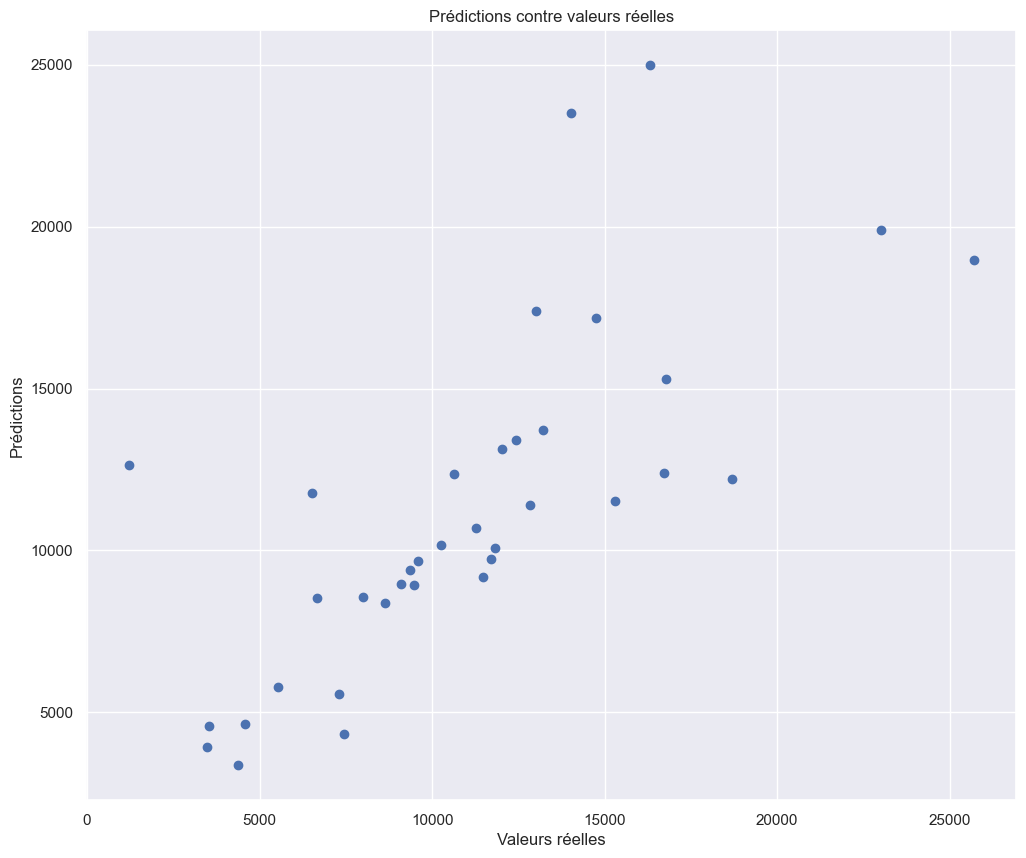

In [43]:
# Afficher en nuage de points les prédictions contre les valeurs réelles

# Augmenter la taille de la figure si nécessaire
plt.scatter(y_test, y_pred_lin)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions contre valeurs réelles")
plt.show()




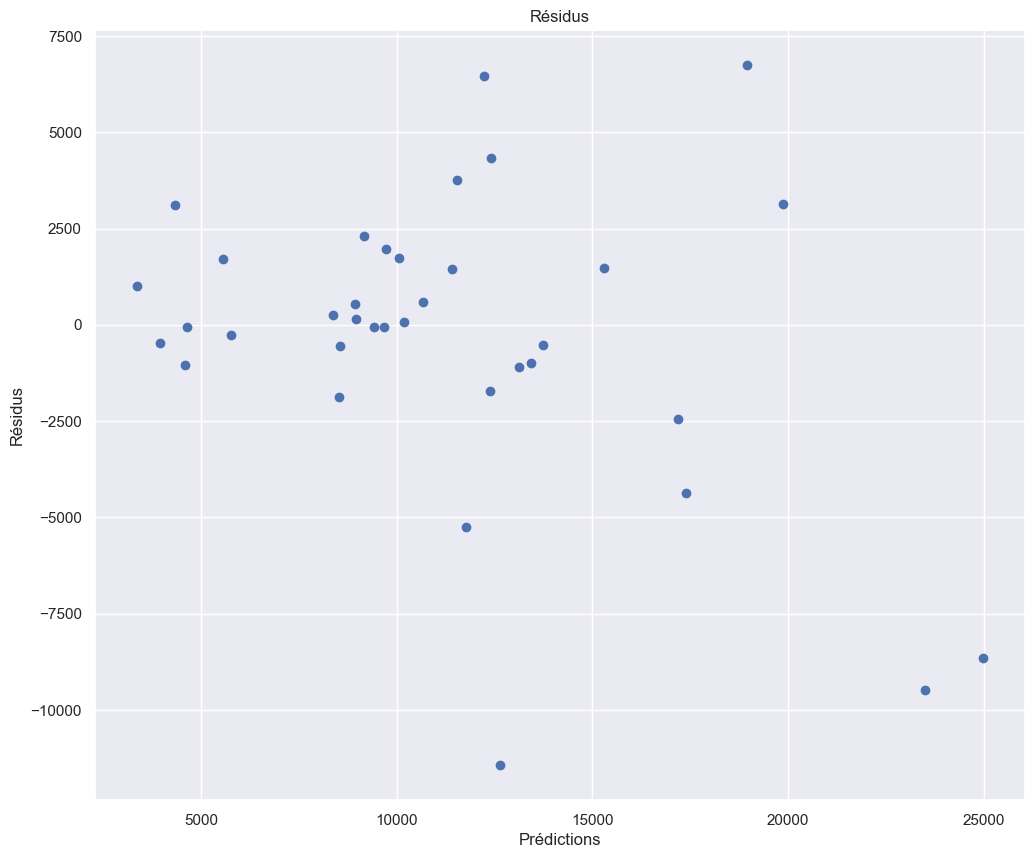

In [44]:
# Afficher en nuage de points les résidus

# Augmenter la taille de la figure si nécessaire

plt.scatter(y_pred_lin, y_test - y_pred_lin)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.title("Résidus")
plt.show()


##### La prochaine étape  consiste à revenir en arrière, c'est à dire à supprimer davantage de valeurs aberrantes et à vérifier si notre modèle peut être amélioré

## 10. Comment utiliser notre modèle de régression linéaire

In [47]:
# Mettre les coefficients dans un tableau

coef_table = pd.DataFrame({'feature': X_train.columns, 'coefficient': lin_reg.coef_})
print(coef_table)

              feature  coefficient
0             Semaine    -1.102110
1            Visitors    -2.696123
2  Depense Marketing      8.705817
3               Promo  2288.003332
4            Jour_Nom    45.586347


In [56]:
# Faire des prédictions:
#- créer de nouvelles valeurs pour différentes variables (sinon prendre une obervation du test)
#- en utilisant la formule de la régression et le tableau de coefficients
#- la prédiction est-elle proche par rapport à la valeur réelle que vous avez définie?
X_new = [ [49.0, 1541.0, 1016.000000, 0, 2], [35.0, 1200.0, 1016.000000, 1, 2], [26.0, 1300.0, 1016.000000, 0, 2] ]
y_pred = lin_reg.predict(X_new)
y_real = [6000, 7000, 9000]

for i in range(len(y_pred)):
    print("Prediction:", y_pred[i], "Actual:", y_real[i])

Prediction: 5566.976060108167 Actual: 6000
Prediction: 8789.786835075582 Actual: 7000
Prediction: 6242.090206684851 Actual: 9000


a:\Programme\Python\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [ ]:
######################## Où et comment pouvons-nous l'appliquer en tant qu'entreprise ? #######################################


# 1. Nous pouvons créer un outil de prédiction pour les campagnes de marketing à venir 

# 2. Nous pouvons analyser les campagnes de marketing passées et suggérer ce qui a fonctionné, ce qui n'a pas fonctionné, 
# combien d'argent nous aurions pu gagner et suggérer des changements - optimisation de la campagne

# 3. Nous pouvons prédire le potentiel des magasins, des comptes, des canaux ou des campagnes et le comparer avec ce qu'ils réalisent réellement.
# Ensuite, nous pouvons les noter et faire des suggestions (surpasser ou sous-passer le potentiel des comptes).

# 4. Nous pouvons déployer le modèle dans un serveur/cloud et ajuster automatiquement les campagnes qui génèrent le plus d'argent en fonction du jour.
